# Exploratory Data Analysis On Global Terrorism


### Cyrine Meddeb

### This project is developed as a part of Internship in Data Science & Business Analytics under The Sparks Foundation

This is a Data Analytics project focusing on Global Terrorism. This project tries to understand the dataset before modelling it. Exploratory Data Analysis means visualizing and/or understanding the data before using the data into modelling
The project covers the following:<br />
● Tries to find out the hot zone of terrorism.<br />
● The security issues and insights that can be derived by EDA.<br />
<br />
Used dataset : Global terrorism <br />
Link to dataset : <a href="https://bit.ly/2TK5Xn5">Click here</a>

### Importing libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.mode.chained_assignment = None 

### Importing the dataset

In [6]:
df = pd.read_csv("globalterrorism_dataset.csv", low_memory=False, encoding="latin-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Printing Column wise info for the data frame to take further decisions

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

### Eliminating some of the columns since most of their values are null and renaming them with a more meaningful name

In [8]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City',
                           'latitude':'latitude','longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype',
                           'weaptype1_txt':'Weapon','nkill':'kill','nwound':'Wound'},inplace=True)

In [10]:
data_frame = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill','Wound','target1','summary',
                         'Group','Targettype','Weapon','motive']]

In [13]:
data_frame.shape

(181691, 18)

In [14]:
data_frame.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


### Preprocessing of the data

In [15]:
data_frame.isna().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [17]:
# Filling the missing values of wound and killed people with 0
values = {"Wound": 0, "kill": 0}
data_frame.fillna(value=values)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [28]:
data_frame['Casualities'] = data_frame['kill'] + data_frame['Wound']

### Data visualization

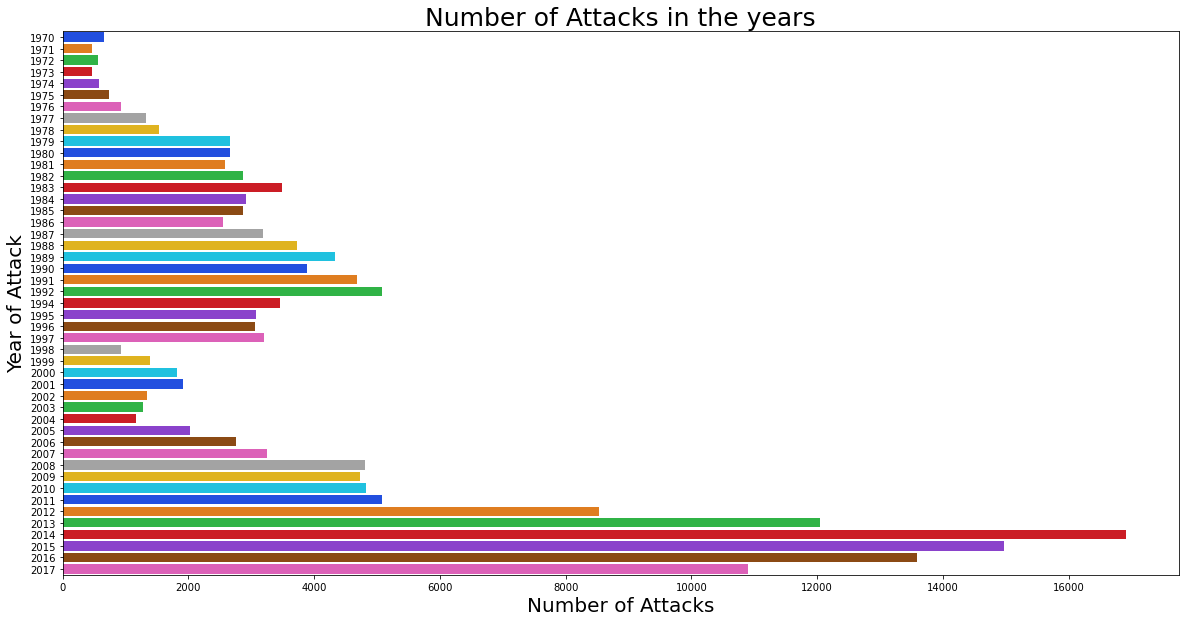

In [29]:
year = data_frame['Year'].unique()
years_count = data_frame['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(y = year,
           x = years_count,
           palette = "bright",
           orient="h")
plt.xticks(rotation = 0)
plt.xlabel('Number of Attacks',fontsize=20)
plt.ylabel('Year of Attack',fontsize=20)
plt.title('Number of Attacks in the years',fontsize=25)
plt.show()

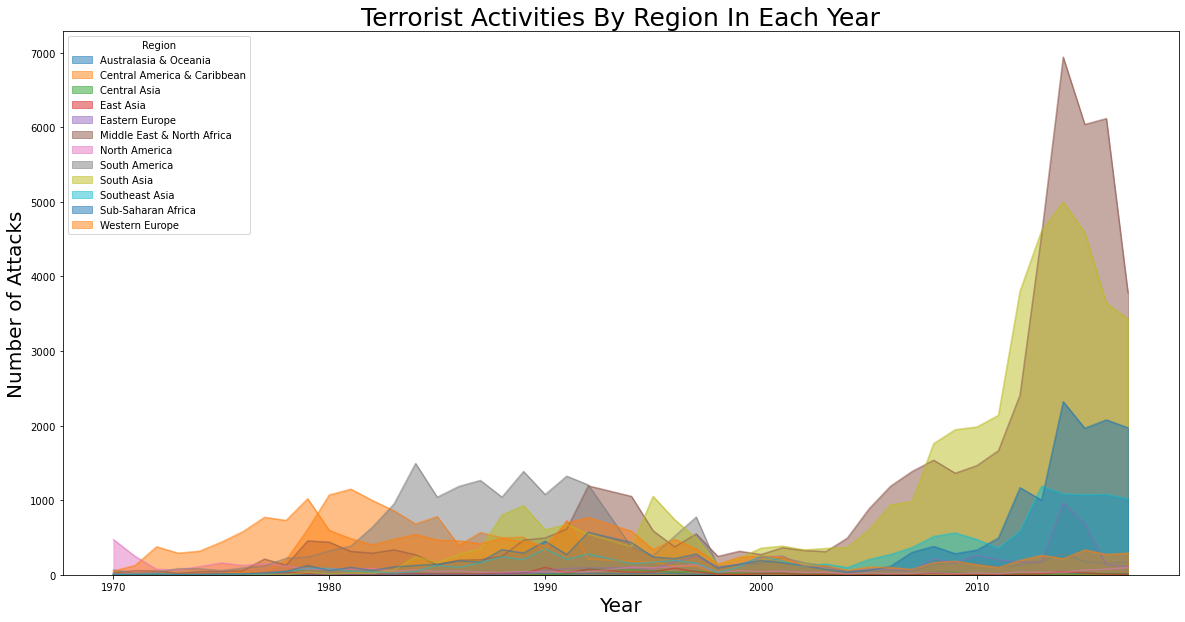

In [30]:
pd.crosstab(data_frame.Year, data_frame.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

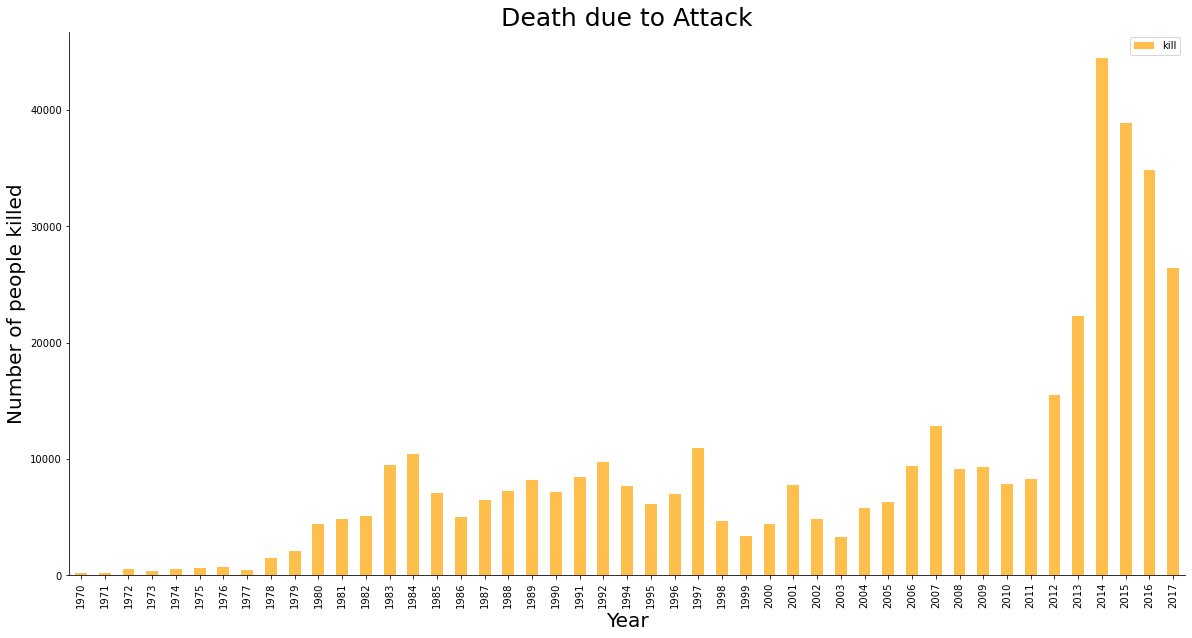

In [35]:
dframe = data_frame[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
dframe.plot(kind='bar',alpha=0.7,ax=ax4,color='orange')
plt.xticks(rotation = 90)
plt.title("Death due to Attack",fontsize=25)
plt.ylabel("Number of people killed",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

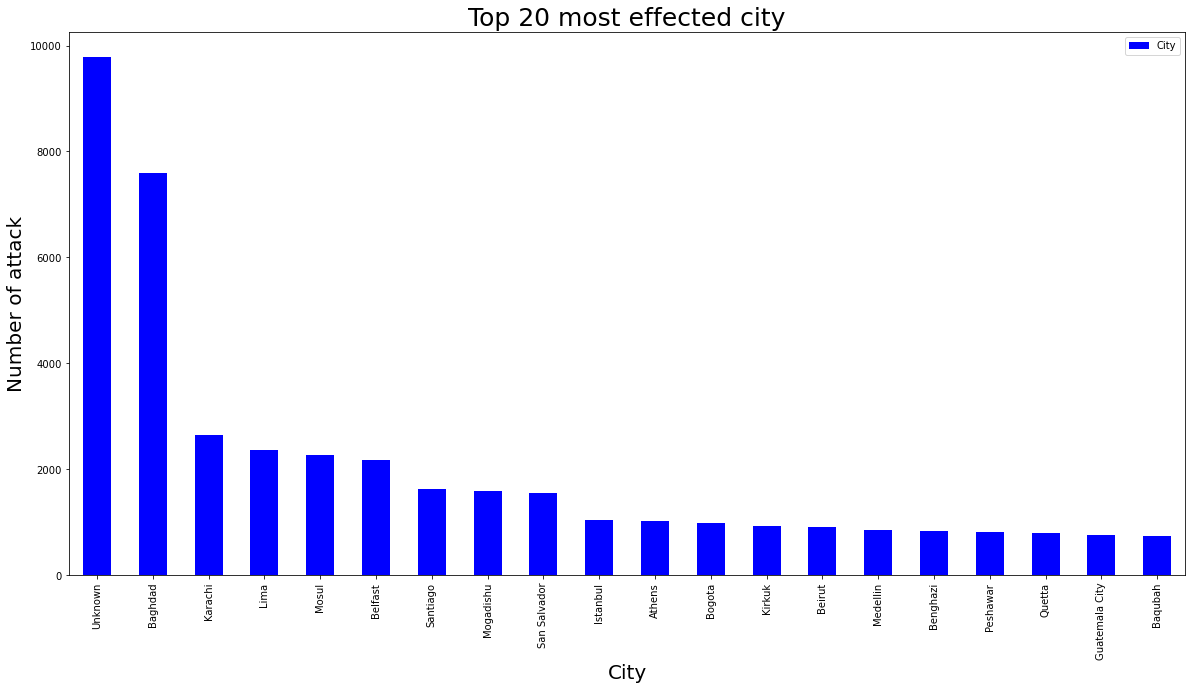

In [33]:
data_frame['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(20).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 90)
plt.xlabel("City",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Top 20 most effected city",fontsize=25)
plt.show()

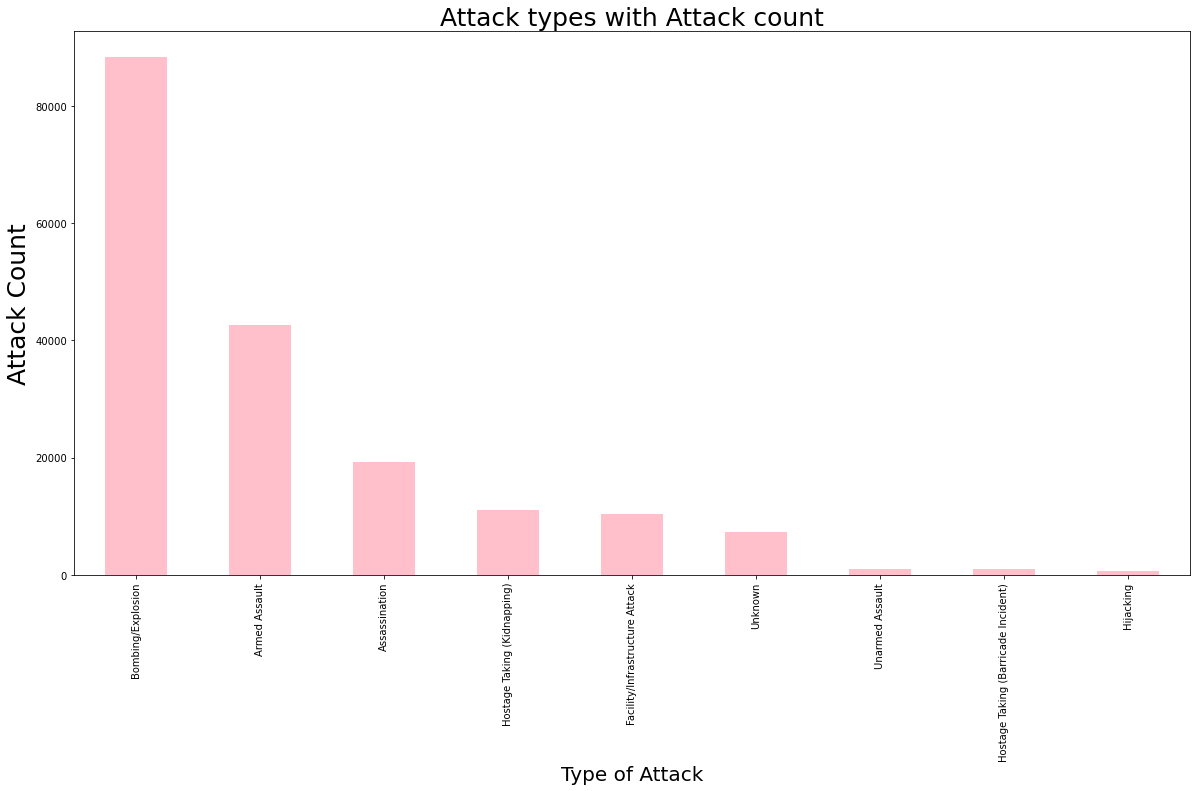

In [36]:
data_frame['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='pink')
plt.xticks(rotation = 90)
plt.xlabel("Type of Attack",fontsize=20)
plt.ylabel("Attack Count",fontsize=25)
plt.title("Attack types with Attack count",fontsize=25)
plt.show()

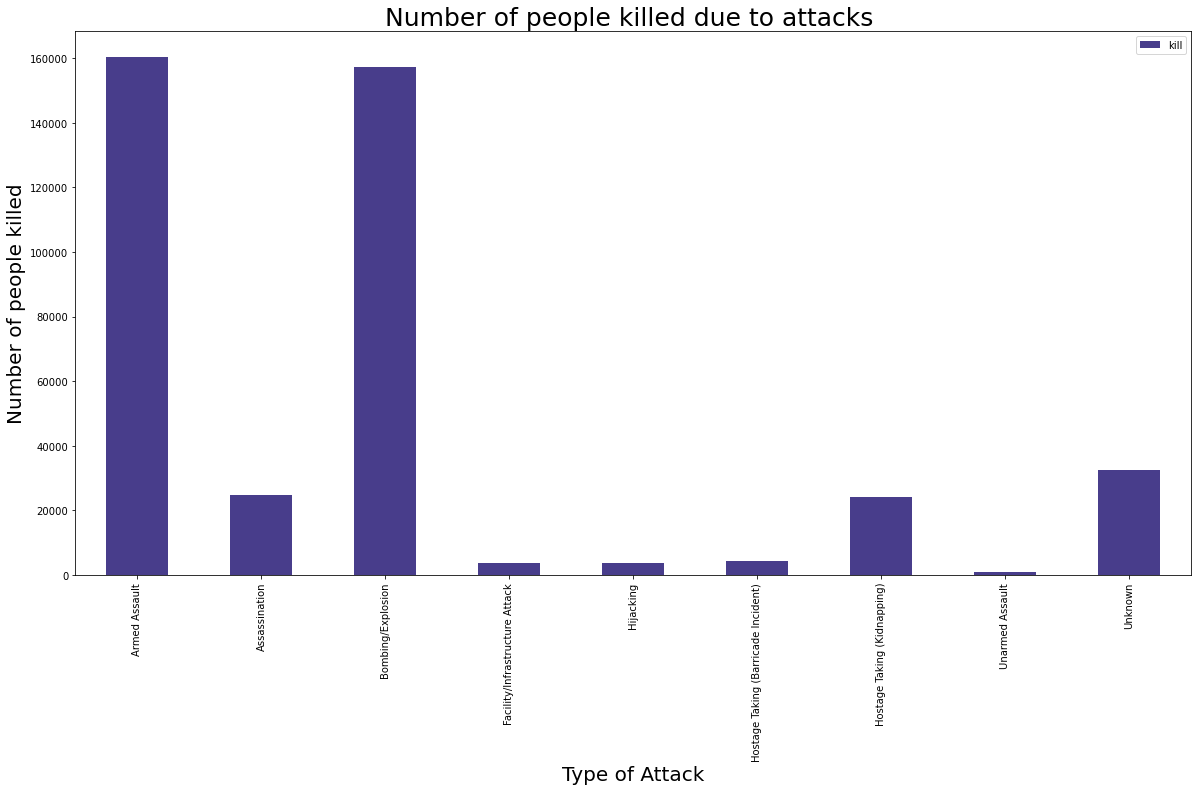

In [37]:
data_frame[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=90)
plt.title("Number of people killed due to attacks ",fontsize=25)
plt.ylabel('Number of people killed',fontsize=20)
plt.xlabel('Type of Attack',fontsize=20)
plt.show()

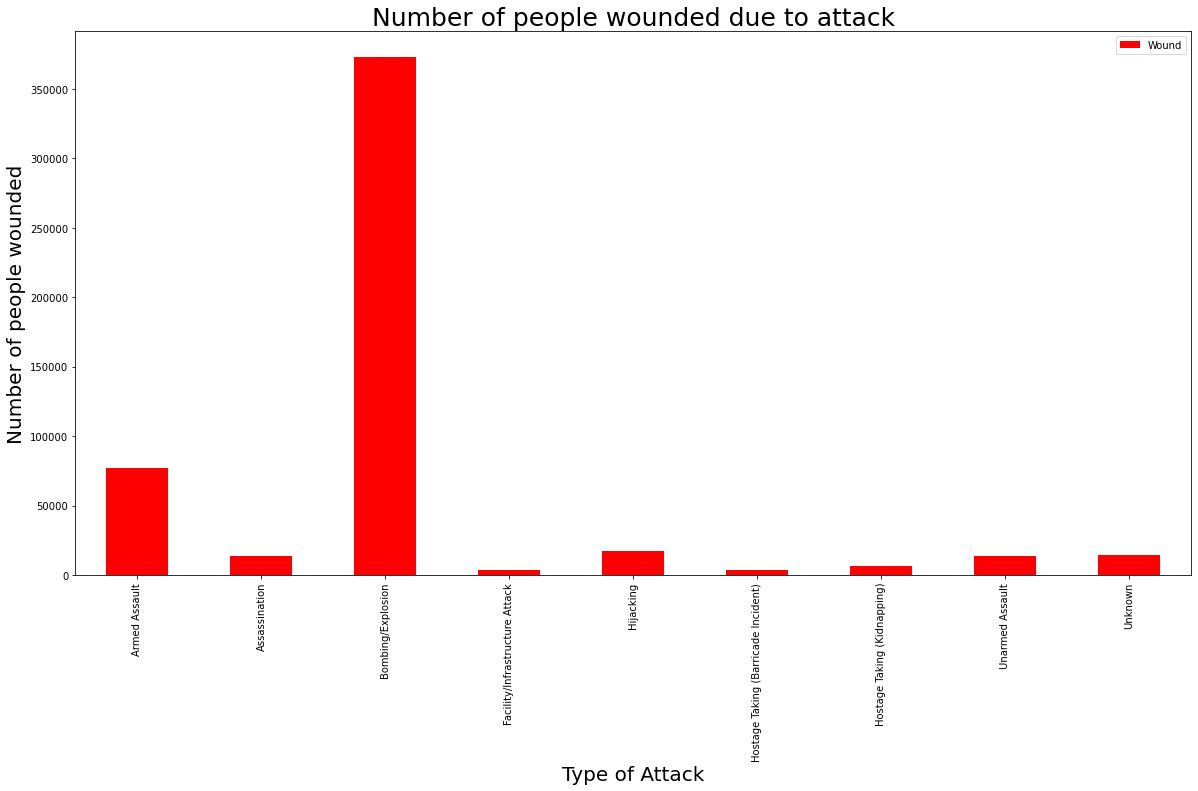

In [38]:
data_frame[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['red'])
plt.xticks(rotation=90)
plt.title("Number of people wounded due to attack",fontsize=25)
plt.ylabel('Number of people wounded',fontsize=20)
plt.xlabel('Type of Attack',fontsize=20)
plt.show()

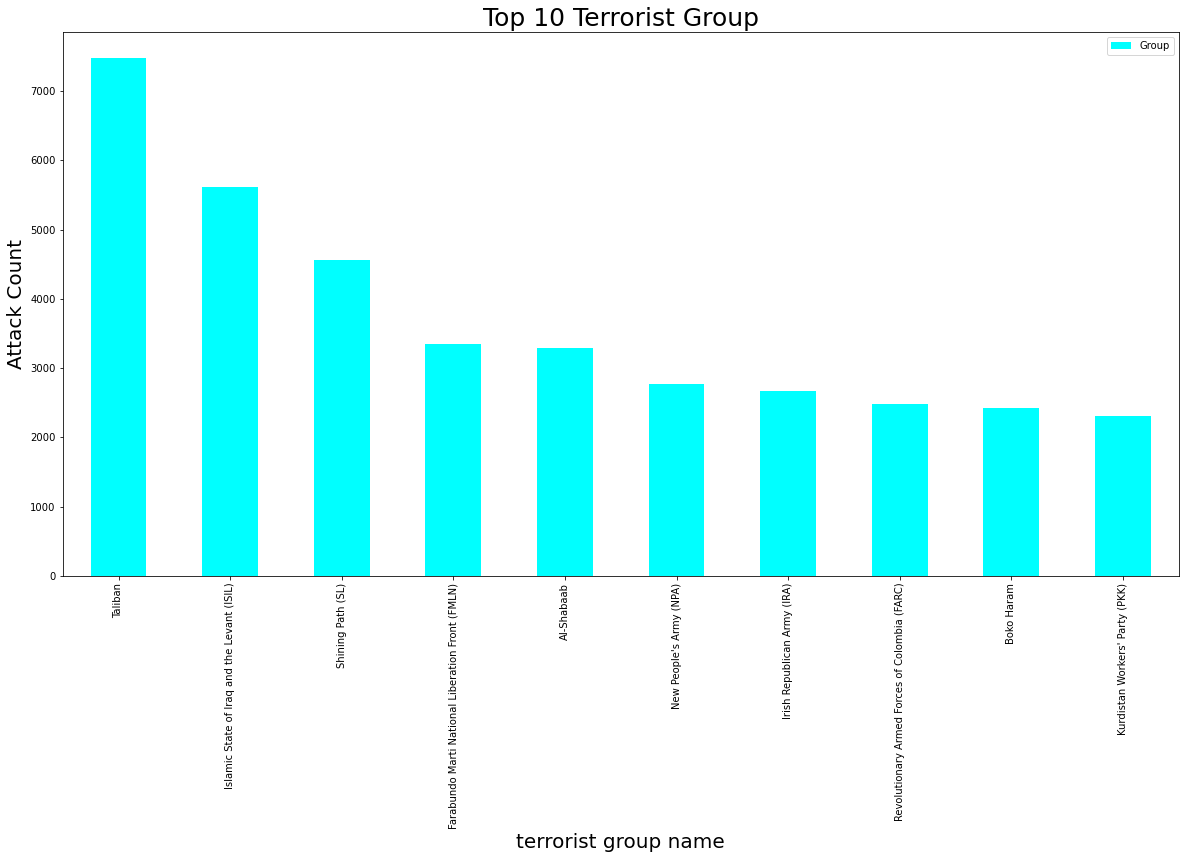

In [39]:
data_frame['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='cyan',figsize=(20,10))
plt.title("Top 10 Terrorist Group",fontsize=25)
plt.xlabel("terrorist group name",fontsize=20)
plt.ylabel("Attack Count",fontsize=20)
plt.show()

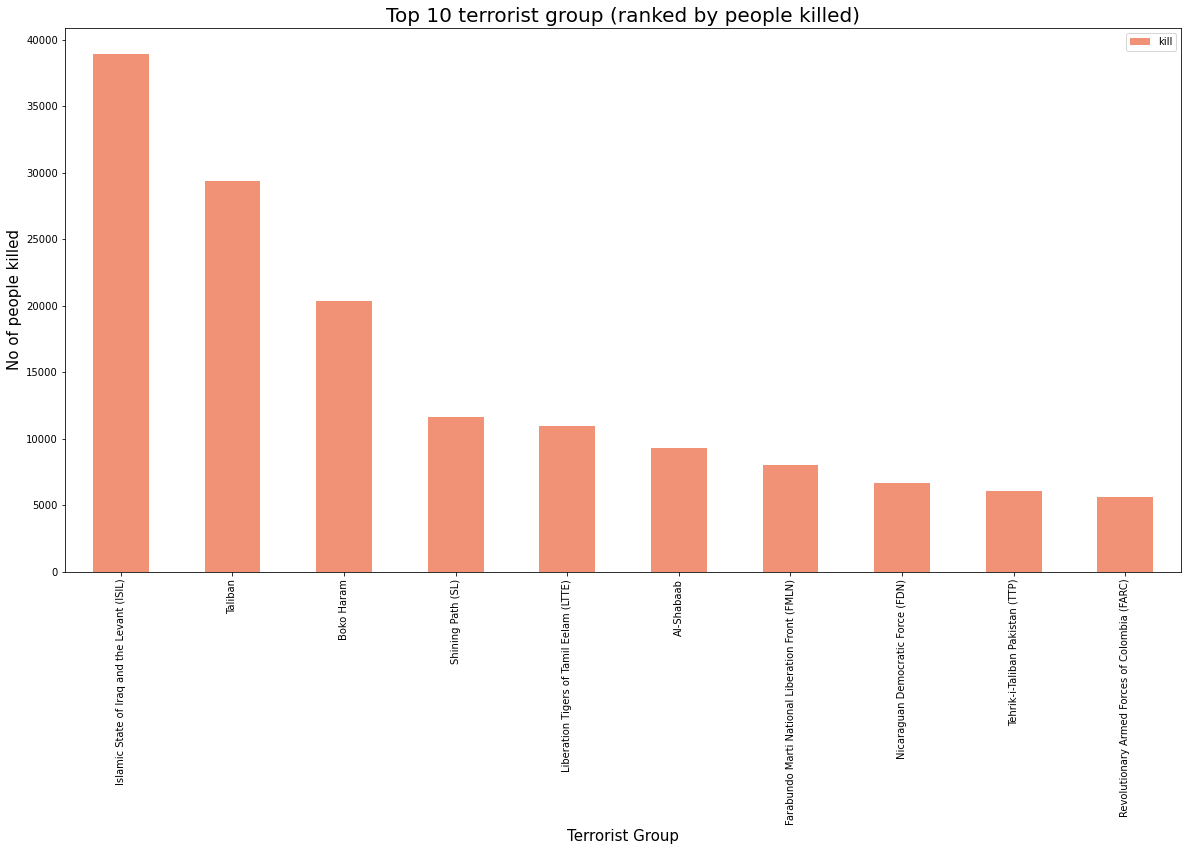

In [40]:
data_frame[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='#f19276',figsize=(20,10))
plt.title("Top 10 terrorist group (ranked by people killed)",fontsize=20)
plt.xlabel("Terrorist Group",fontsize=15)
plt.ylabel("No of people killed",fontsize=15)
plt.show()

### Conclusion and results

- Year with the most attacks: 2014

- Country with the most attacks: Iraq

- City with the most attacks: Baghdad

- Region with the most attacks: Middle East & North Africa

- Month with the most attacks: 5

- Group with the most attacks: Taliban

- Most Attack Types: Bombing/Explosion


